## How to find Cosine Similarity

In [1]:
from  sklearn.metrics.pairwise import cosine_similarity

In [10]:
cosine_similarity([[3,5,4]],[[3,0,2]])

array([[0.66679486]])

In [11]:
cosine_similarity([[1,0,2]],[[3,0,2]])

array([[0.86824314]])

In [12]:
cosine_similarity([[3,5,4]],[[1,0,2]])

array([[0.69570109]])

In [13]:
cosine_similarity([[1,1,0,1]],[[1,1,1,1]])

array([[0.8660254]])

In [14]:
cosine_similarity([[0,1]],[[1,1]])

array([[0.70710678]])

## Implementing Collaborative Filtering Approach

In [35]:
import pandas as pd
import seaborn as sns

In [36]:
df = pd.read_csv('ratings.csv')

In [37]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [38]:
df.shape

(100836, 4)

In [39]:
df['userId'].nunique()

610

In [40]:
df['movieId'].nunique()

9724

In [41]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [95]:
rating_count= list(df['movieId'].value_counts())

In [98]:
rating_count[:10]

[329, 317, 307, 279, 278, 251, 238, 237, 224, 220]

<Axes: >

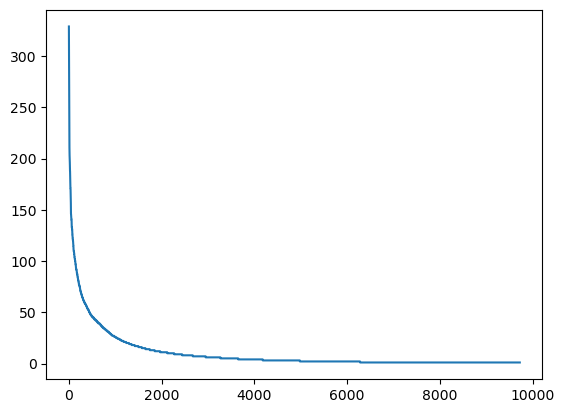

In [97]:
sns.lineplot(rating_count)

## Version 1

In [43]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
user_df = pd.crosstab(index=df['userId'], columns=df['movieId'],values=df['rating'],aggfunc=sum)

In [46]:
user_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
user_df.fillna(0,inplace=True)

In [48]:
user_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
list(user_df.index)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [55]:
user_similarity= cosine_similarity(user_df,user_df)

In [56]:
user_similarity

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [57]:
user_similarity = pd.DataFrame(user_similarity, index=list(user_df.index),columns=list(user_df.index))

In [58]:
user_similarity.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [59]:
import numpy as np

In [65]:
user3 = list(user_similarity[user_similarity.index==3].values[0])

In [66]:
user3

[0.05972026184426368,
 0.0,
 1.0,
 0.002251389028959687,
 0.005019716006155572,
 0.003936333734833688,
 0.0,
 0.004941155351896029,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0030638255708359775,
 0.017251432939031117,
 0.0322991841341747,
 0.009813114789664401,
 0.02824050262113072,
 0.019141557615421058,
 0.008755947753322918,
 0.004016746396425398,
 0.003069557709749743,
 0.003081119173312174,
 0.0025924731568782123,
 0.005100036562293173,
 0.0,
 0.0023316224044960692,
 0.029771122166175,
 0.005974394843639579,
 0.0,
 0.0035073957979284884,
 0.015494160830558231,
 0.007156347621535332,
 0.0007358542978488061,
 0.0,
 0.0,
 0.0,
 0.004196098870828041,
 0.003638770230694815,
 0.0025300852706869794,
 0.0019749294052500512,
 0.01156803619628765,
 0.0,
 0.030638255708359773,
 0.021674696056228106,
 0.0,
 0.0026455729475886127,
 0.0,
 0.0057684130664594855,
 0.006371159843020143,
 0.044296674547131196,
 0.0,
 0.0,
 0.0,
 0.042039483105855244,
 0.0,
 0.03391877360614969,
 0.005283388090335989,
 0.007

In [74]:
list(np.argsort(user3)[-5:])[::-1]

[2, 312, 376, 531, 526]

In [81]:
sim_ulist = []
for uid in range(1,11):
    u= list(user_similarity[user_similarity.index==uid].values[0])
    l = list(np.argsort(u)[-5:-1]+1)[::-1]
    sim_ulist.append(l)

In [82]:
sim_ulist

[[266, 313, 368, 57],
 [366, 417, 378, 550],
 [313, 377, 532, 527],
 [391, 603, 156, 275],
 [470, 229, 565, 235],
 [117, 181, 58, 240],
 [239, 399, 220, 354],
 [379, 94, 512, 347],
 [508, 165, 399, 77],
 [159, 143, 563, 177]]

In [90]:
u266 = df[df['userId']==266]['movieId'].values
u266

array([   1,    6,   16,   17,   21,   24,   32,   39,   45,   50,   64,
         69,   95,  110,  132,  135,  145,  198,  223,  235,  260,  288,
        296,  316,  353,  356,  367,  368,  377,  440,  441,  457,  474,
        476,  480,  493,  514,  541,  551,  555,  589,  592,  608,  694,
        733,  778,  785,  919,  924, 1036, 1042, 1060, 1079, 1080, 1089,
       1090, 1093, 1097, 1127, 1136, 1171, 1196, 1197, 1198, 1199, 1200,
       1206, 1208, 1210, 1213, 1215, 1220, 1222, 1240, 1242, 1259, 1261,
       1265, 1266, 1270, 1275, 1285, 1288, 1291, 1297, 1298, 1356, 1374,
       1375, 1376, 1394, 1405, 1466, 1476, 1485, 1500, 1517, 1527, 1573,
       1580, 1597, 1610, 1614, 1617, 1641, 1663, 1722, 1732, 1772, 1784,
       1866, 1883, 1884, 1911, 1912, 1923, 1968, 2000, 2028, 2064, 2094,
       2097, 2105, 2115, 2167, 2174, 2194, 2195, 2249, 2253, 2278, 2288,
       2300, 2302, 2321, 2353, 2355, 2384, 2387, 2395, 2396, 2428, 2471,
       2490, 2539, 2560, 2571, 2580, 2599, 2605, 26

In [91]:
u1 = df[df['userId']==1]['movieId'].values
u1

array([   1,    3,    6,   47,   50,   70,  101,  110,  151,  157,  163,
        216,  223,  231,  235,  260,  296,  316,  333,  349,  356,  362,
        367,  423,  441,  457,  480,  500,  527,  543,  552,  553,  590,
        592,  593,  596,  608,  648,  661,  673,  733,  736,  780,  804,
        919,  923,  940,  943,  954, 1009, 1023, 1024, 1025, 1029, 1030,
       1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097,
       1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219,
       1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278,
       1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517,
       1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777,
       1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018,
       2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096,
       2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193,
       2253, 2268, 2273, 2291, 2329, 2338, 2353, 23

In [93]:
set(u1)-set(u266)

{3,
 47,
 70,
 101,
 151,
 157,
 163,
 216,
 231,
 333,
 349,
 362,
 423,
 500,
 527,
 543,
 552,
 553,
 590,
 593,
 596,
 648,
 661,
 673,
 736,
 780,
 804,
 923,
 940,
 943,
 954,
 1009,
 1023,
 1024,
 1025,
 1029,
 1030,
 1031,
 1032,
 1049,
 1073,
 1092,
 1214,
 1219,
 1224,
 1226,
 1256,
 1258,
 1278,
 1282,
 1348,
 1377,
 1396,
 1408,
 1445,
 1473,
 1552,
 1587,
 1620,
 1625,
 1644,
 1676,
 1777,
 1793,
 1804,
 1805,
 1920,
 1927,
 1954,
 1967,
 2005,
 2012,
 2018,
 2033,
 2046,
 2048,
 2054,
 2058,
 2078,
 2090,
 2093,
 2096,
 2099,
 2116,
 2137,
 2139,
 2141,
 2143,
 2161,
 2193,
 2268,
 2273,
 2291,
 2329,
 2338,
 2366,
 2389,
 2406,
 2414,
 2427,
 2450,
 2459,
 2470,
 2478,
 2492,
 2502,
 2528,
 2529,
 2542,
 2596,
 2616,
 2617,
 2628,
 2640,
 2641,
 2644,
 2648,
 2654,
 2657,
 2692,
 2761,
 2826,
 2858,
 2872,
 2899,
 2944,
 2948,
 2949,
 2987,
 2991,
 2993,
 2997,
 3033,
 3034,
 3053,
 3062,
 3147,
 3168,
 3176,
 3243,
 3247,
 3253,
 3273,
 3386,
 3439,
 3440,
 3441,
 3448,

In [94]:
set(u266)-set(u1)

{16,
 17,
 21,
 24,
 32,
 39,
 45,
 64,
 69,
 95,
 132,
 135,
 145,
 198,
 288,
 353,
 368,
 377,
 440,
 474,
 476,
 493,
 514,
 541,
 551,
 555,
 589,
 694,
 778,
 785,
 924,
 1036,
 1079,
 1093,
 1171,
 1199,
 1200,
 1215,
 1242,
 1259,
 1261,
 1266,
 1285,
 1288,
 1297,
 1356,
 1374,
 1375,
 1376,
 1394,
 1405,
 1466,
 1476,
 1485,
 1527,
 1597,
 1610,
 1614,
 1641,
 1663,
 1722,
 1772,
 1784,
 1866,
 1883,
 1884,
 1911,
 1912,
 1923,
 1968,
 2064,
 2097,
 2167,
 2194,
 2195,
 2249,
 2278,
 2288,
 2300,
 2302,
 2321,
 2355,
 2384,
 2396,
 2428,
 2471,
 2490,
 2539,
 2560,
 2599,
 2605,
 2683,
 2702,
 2706,
 2710,
 2712,
 2770,
 2791,
 2804,
 2812,
 2863,
 2890,
 2918,
 2968,
 3016,
 3020,
 3039,
 3060,
 3108,
 3113,
 3142,
 3156,
 3265}

## Apriori Algorithm

In [101]:
data = pd.read_csv('store_data.csv',header=None)

In [102]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
data.shape

(7501, 20)

In [105]:
data.values[1,3]

nan

In [110]:
records=[]
for i in range(0,7501):
  #  l = [str(data.values[i,j]) for j in range(0,20)]

    l = []
    for j in range(0,20):
        d = str(data.values[i,j])
        if(d !='nan'):
            l.append(d)
        
    records.append(l)

In [111]:
records

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [114]:
from apyori import apriori

In [119]:
patterns = apriori(records,min_support=0.0045, min_confidence= 0.10, min_lift= 1.2, min_length=2)

In [120]:
patterns = list(patterns)

In [121]:
patterns

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'chocolate', 'almonds'}), support=0.005999200106652446, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'chocolate'}), confidence=0.29411764705882354, lift=1.7950988369310295)]),
 RelationRecord(items=frozenset({'eggs', 'almonds'}), support=0.006532462338354886, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'eggs'}), confidence=0.3202614379084967, lift=1.7821076007059597)]),
 RelationRecord(items=frozenset({'green tea', 'almonds'}), support=0.005065991201173177, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'green tea'}), confidence=0.24836601307189543, lift=1.879912678

In [126]:
patterns[0][1]

0.005199306759098787

In [132]:
for item in patterns:
    main_item = item[0]
   
    pair_items = [x for x in main_item]

    print(pair_items[0],'---> ',pair_items[1])
    print('Support ', str(item[1]))
    print('Lift', str(item[-1]))

burgers --->  almonds
Support  0.005199306759098787
Lift [OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]
chocolate --->  almonds
Support  0.005999200106652446
Lift [OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'chocolate'}), confidence=0.29411764705882354, lift=1.7950988369310295)]
eggs --->  almonds
Support  0.006532462338354886
Lift [OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'eggs'}), confidence=0.3202614379084967, lift=1.7821076007059597)]
green tea --->  almonds
Support  0.005065991201173177
Lift [OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'green tea'}), confidence=0.24836601307189543, lift=1.879912678155689)]
milk --->  almonds
Support  0.005199306759098787
Lift [OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'milk'}), confidence=0.25490196078431376, lift=1.9670983619785367